In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['NO2y1','NO2y2','NO2y3','year', 'month', 'day']]
Y1 = df['NO2']

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=2)

In [42]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=6,
                                      max_features=0.1,
                                      min_samples_split=3,
                                      min_samples_leaf=2,
                                      learning_rate=0.2)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.2, max_depth=6, max_features=0.1,
                          min_samples_leaf=2, min_samples_split=3,
                          n_estimators=2000)

In [43]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 1.0

Score on test data: 0.5291949311347739

Root Mean Squared Error: 17.381121575702245

Overall model accuracy: 0.5291949311347739


In [44]:
test=data.loc['207':'259']
X=test[['NO2y1','NO2y2','NO2y3','year', 'month', 'day']]
X

,NO2y1,NO2y2,NO2y3,year,month,day
207,76.847143,81.828571,83.730000,2019,12,29
208,52.067143,78.085714,67.225714,2020,1,5
209,58.215714,86.725714,57.842857,2020,1,12
210,58.545714,79.045714,75.028571,2020,1,19
211,44.648571,68.768571,68.434286,2020,1,26
212,49.550000,40.208571,62.091429,2020,2,2
213,50.381429,104.145714,66.960000,2020,2,9
214,72.708571,61.682857,67.874286,2020,2,16
215,73.708571,91.308571,82.401429,2020,2,23
216,88.330000,77.098571,62.438571,2020,3,1


In [45]:
predict=grad_boost.predict(X)

In [46]:
predict

array([32.09571429, 71.00273466, 62.89375656, 62.78652093, 61.04252387,
       64.21546513, 58.19882687, 67.56002647, 58.85653513, 72.93228017,
       77.32018072, 72.85776445, 64.02302534, 51.91742221, 68.76675496,
       60.27334421, 55.25061092, 64.70732068, 62.26028189, 64.75594674,
       52.55652537, 53.65850967, 58.29128225, 53.84964677, 46.08444279,
       57.26915631, 55.18811662, 37.12423262, 46.91966128, 38.44444996,
       42.13341801, 26.64090355, 31.0534666 , 34.02820198, 34.52361995,
       29.09520514, 28.65491807, 30.43974887, 33.88047542, 41.98446078,
       41.82116305, 61.35667619, 41.44191247, 45.66867495, 38.52364857,
       43.48808422, 25.15621858, 41.50690257, 47.53227917, 24.63109368,
       27.19909311, 33.12425555, 40.40422128])

In [47]:
dates=data.loc['207':'259','From Date']

In [48]:
X['From Date']=dates.values

In [49]:
X.columns

Index(['NO2y1', 'NO2y2', 'NO2y3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [50]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [51]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [52]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [53]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

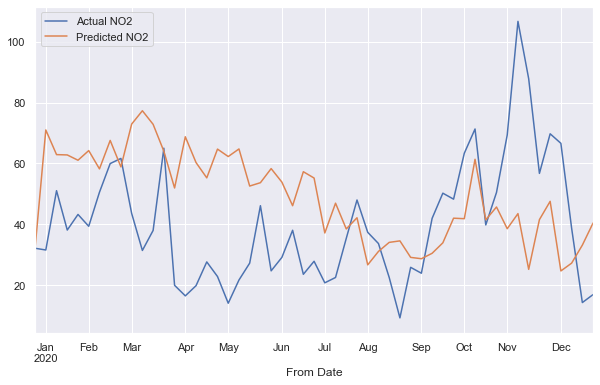

In [54]:
test['NO2'].plot(legend=True, label='Actual NO2', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO2')

In [55]:
np.sqrt(mean_squared_error(test['NO2'],X['pred']))

27.2440301203722

In [56]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 13.55540337745593
MSE: 302.10338722934205
RMSE: 17.381121575702245
R-Squared: 0.5291949311347739


In [57]:
mae = metrics.mean_absolute_error(test['NO2'],X['pred'])
mse = metrics.mean_squared_error(test['NO2'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NO2'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 21.967600436788235
MSE: 742.2371771997477
RMSE: 27.2440301203722
R-Squared: -0.893034201793226


In [58]:
import pickle
filename = 'NO2_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [59]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.5291949311347739


# 3rd plot

In [60]:
testcase = pd.DataFrame()

In [61]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [62]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [63]:
testcase

,test,pred,Corrected
154,102.625714,79.611149,96.992271
192,40.052857,32.625342,50.006463
135,13.340000,25.217391,7.836269
10,80.291429,74.175025,91.556146
13,92.682857,85.814340,103.195461
173,80.028571,55.402597,72.783719
205,39.930000,51.331825,33.950704
23,57.194286,59.686014,42.304892
71,37.427143,66.209222,48.828101
28,42.674286,52.754626,35.373504


In [64]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [65]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.7770881762942305

In [66]:
test2020=pd.DataFrame()

In [67]:
test2020['test']=test['NO2']
test2020['pred']=X['pred']

In [68]:
test2020.index=test.index

In [69]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

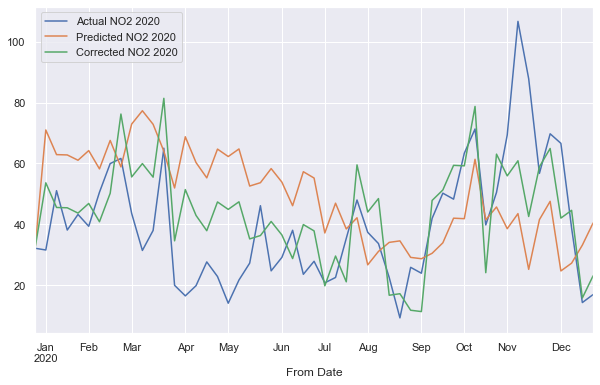

In [70]:
test2020['test'].plot(legend=True, label='Actual NO2 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO2 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NO2 2020')

In [71]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

-0.0449805883965706